# 1. Загрузка и визуализация данных

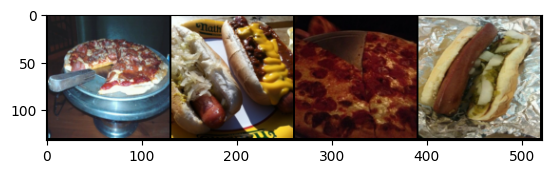

pizza hot_dog pizza hot_dog


In [28]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torchvision
import numpy as np

# Трансформации для изображений
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# Загрузка данных
dataset = datasets.ImageFolder('./normal_eda/train', transform=transform)

# Визуализация нескольких изображений
def imshow(img):
    img = img / 2 + 0.5  
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Получение некоторых изображений
dataiter = iter(torch.utils.data.DataLoader(dataset, batch_size=4, shuffle=True))
images, labels = dataiter.__next__()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % dataset.classes[labels[j]] for j in range(4)))

In [24]:
import numpy as np

def calculate_image_statistics(dataset):
    mean = 0.
    std = 0.
    nb_samples = 0.
    
    for data in dataset:
        image = data[0]
        batch_samples = image.size(0) * image.size(1) * image.size(2)
        image = image.view(batch_samples, -1)
        mean += image.mean(1).sum(0)
        std += image.std(1).sum(0)
        nb_samples += batch_samples
    
    mean /= nb_samples
    std /= nb_samples
    return mean, std

mean, std = calculate_image_statistics(dataset)
print(f"Mean: {mean}, Std: {std}")


Mean: 0.4386770725250244, Std: nan


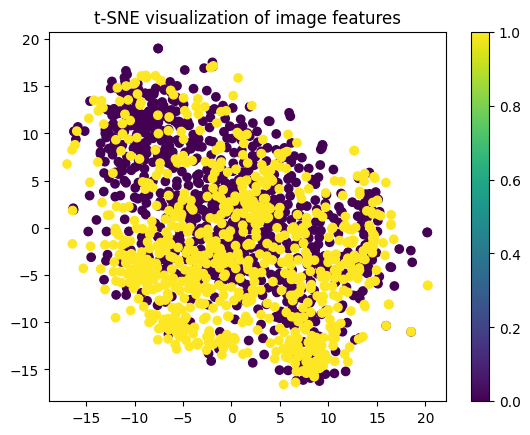

In [25]:
from sklearn.manifold import TSNE

def extract_features(dataset):
    features = []
    labels = []
    for img, label in dataset:
        features.append(img.flatten().numpy())
        labels.append(label)
    return np.array(features), np.array(labels)

features, labels = extract_features(dataset)
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features)

plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis')
plt.colorbar()
plt.title('t-SNE visualization of image features')
plt.show()


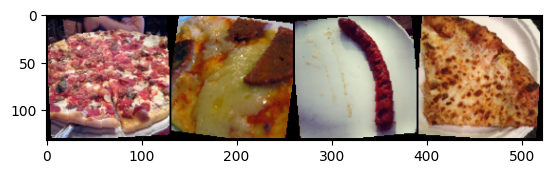

pizza pizza hot_dog pizza


In [29]:
augmentation_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor()
])

augmented_dataset = datasets.ImageFolder('./normal_eda/train', transform=augmentation_transforms)

# Визуализация нескольких аугментированных изображений
dataiter = iter(torch.utils.data.DataLoader(augmented_dataset, batch_size=4, shuffle=True))
images, labels = dataiter.__next__()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % dataset.classes[labels[j]] for j in range(4)))
